### Crops Price Prediction

# Group 2

# Student names:

1.Milton Kabute

2.Joyce Muthiani

3.Thorne Makau

4.Collin Cheruiyot

5.Kenneth Karanja


Instructor Name :Diana Mongina




#   Business understanding
According to a Business Daily article, Kenyan farmers earn less even though consumers pay more for food products as there is a huge disparity between farmers' price and consumer prices. Kenyan Farmers commodities prices are influenced by the inefficient market structure and the intermediaries between producers and consumers. It is noted that the market dynamics are dictated by the middlemen contributing to divergent wholesale and retail prices in the Kenyan Markets. However, there are external factors that have affected farmers' commodities prices such as subsidy schemes, currency fluctuation but farmers continue to earn less than the market price set in Kenyan stores and marketplaces.

According to the KARI report, the supply side factors, there is a decline in agricultural productivity, due to poor market access and market exploitation. for small-scale farmers
Agriculture is a key contributor to the Kenyan GDP and provides livelihoods to a large part of the Kenyan Population.
CBK Survey 2023 shows that the food commodities prices are down.In addition, the survey shows that foreign currency performance could be a factor in downward adjustment of the food prices.  

For optimal business focus, we consider prioritizing    the following crops: Maize, Beans, Onions,Wheat, Rice.
These crops offer potential for profitability and market demand, making them strategic choices for your agricultural ventures.




# Objectives
Enable farmer's and other stakeholders to anticipate the market trends of the crop produce, resource allocation, and market position

Enhance market transparency and price forecasting to farmers and industry policymakers.

Predict the price food products based on supply and demand of food products and market location

Market segmentation for the farmers  based on the prices, supply volumes, and location. - Best Market Location Place and Product to sell


## Scope
Developing machine learning models to forecast crop yield prices based on factors such as location, time, supply dynamics, and currency fluctuations.

Creating a user-friendly interface for farmers to access predictive pricing updates and market segmentation analysis.

Utilizing historical agricultural commodity prices and CBK currency data to develop accurate forecasting models.

Providing training and support to farmers in utilizing the price forecasting system effectively.

# Stakeholders

1.Kenya Farmers Association

2.Small-scale Farmers

3.Government Agencies (e.g., Ministry of Agriculture, Central Bank of Kenya)

4.Agricultural Traders and Middlemen

5.Financial Institutions

6.Consumers

# Problem statement
In Kenya, farmers often face significant disparities between the prices they receive for their crops and the prices consumers pay at marketplaces. This gap is primarily driven by inefficient market structures and the presence of intermediaries who exploit the lack of transparency in pricing. As a result, farmers struggle to earn fair prices for their produce, despite being a crucial component of the country's GDP and a source of livelihood for many. To address this challenge, there is a pressing need for a comprehensive price forecasting system that leverages historical and real-time data, supported by machine learning models. Such a system would empower farmers with predictive pricing updates, enhance market transparency, and enable informed decision-making for all stakeholders along the agricultural value chain.


In [1]:
#import requests
#from bs4 import BeautifulSoup
#import pandas as pd

# custom headers
#headers = {
    #"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.9999.999 Safari/537.36",
    #"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    #"Accept-Language": "en-US,en;q=0.9",
#}

# Function to scrape data for a specific crop
#def scrape_data(product_name, urls):
    #cleaned_data = []

    #for url in urls:
        #response = requests.get(url, headers=headers)
        #if response.status_code == 200:
            #soup = BeautifulSoup(response.content, "html.parser")
            #table = soup.find("table")
            #if table:
                #data = [[product_name] + [cell.get_text(strip=True) for cell in row.find_all("td")][4:10] for row in table.find_all("tr") if len(row.find_all("td")) >= 10]
                #cleaned_data.extend(data)

    #return pd.DataFrame(cleaned_data, columns=["Product", "Market Location", "Wholesale Price", "Retail Price", "Supply Volume", "County", "Date"])

# URLs for different crops
#urls = {
    #"Beans": [
        #f"https://amis.co.ke/site/market/{i}?product=30&per_page=3000" for i in range(0, 33001, 3000)
   # ],
    #"Dry Maize": [
        #f"https://amis.co.ke/site/market/{i}?product=1&per_page=3000" for i in range(0, 33001, 3000)
   # ],
    #"Rice": [
        #f"https://amis.co.ke/site/market/{i}?product=4&per_page=3000" for i in range(0, 33001, 3000)
   # ],
    #"Onion": [
        #f"https://amis.co.ke/site/market/{i}?product=158&per_page=3000" for i in range(0, 33001, 3000)
  #  ]
#}

# Scrape data for each crop
#data = pd.concat([scrape_data(product, urls[product]) for product in urls.keys()], ignore_index=True)

# Display the combined DataFrame
#print(data)


### Strip String Values on Wholesale and Retail Price Column

In [2]:
# remove "/kg" from Wholesale Price and Retail Price columns
#data["Wholesale Price"] = data["Wholesale Price"].str.strip("/Kg")
#data["Retail Price"] = data["Retail Price"].str.strip("/Kg")

# Display the updated DataFrame
#print(data)


## Relevant Libraries

In [3]:

#!pip install pmdarima


In [4]:
# relevant all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from mlxtend.frequent_patterns import apriori, association_rules
# Suppress warnings
warnings.filterwarnings("ignore")




## Data Understanding

In [5]:
# read the usd kes csv
usd = pd.read_csv(r'C:\Users\USER\Project5\usd_kes.csv')
usd


,Date,Price,Open,High,Low,Vol.,Change %
0,04/25/2024,135.00,134.50,135.00,134.50,NaN,0.75%
1,04/24/2024,134.00,134.50,135.00,134.00,NaN,0.00%
2,04/23/2024,134.00,133.50,134.50,133.50,NaN,0.37%
3,04/22/2024,133.50,133.50,134.00,133.00,NaN,0.38%
4,04/19/2024,133.00,133.00,133.55,132.75,NaN,0.19%
...,...,...,...,...,...,...,...
1266,05/01/2019,101.15,101.15,101.15,101.15,NaN,0.00%
1267,04/30/2019,101.15,101.40,101.50,100.85,0.15K,-0.15%
1268,04/29/2019,101.30,101.60,101.60,101.30,0.11K,-0.20%
1269,04/26/2019,101.50,101.60,101.60,101.40,0.07K,-0.10%


In [6]:
# number of rows and columns
usd.shape

(1271, 7)

In [7]:
# drop these irrelevant columns
usd.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)
usd


,Date,Price
0,04/25/2024,135.00
1,04/24/2024,134.00
2,04/23/2024,134.00
3,04/22/2024,133.50
4,04/19/2024,133.00
...,...,...
1266,05/01/2019,101.15
1267,04/30/2019,101.15
1268,04/29/2019,101.30
1269,04/26/2019,101.50


In [8]:
usd.head()

,Date,Price
0,04/25/2024,135.0
1,04/24/2024,134.0
2,04/23/2024,134.0
3,04/22/2024,133.5
4,04/19/2024,133.0


In [9]:
# rename price to usd_rate
usd.rename(columns={'Price': 'usd_rate'}, inplace=True)


## Missing values usd dataset

In [10]:
# check missing values in the usd dataset
usd.isnull().sum()


Date        0
usd_rate    0
dtype: int64

In [11]:
# read crop prices csv file
data = pd.read_csv(r"C:\Users\USER\Project5\crop_prices.csv")
data

,Product,Market Location,Wholesale Price,Retail Price,Supply Volume,County,Date
0,Bean,Mukuyu Market,111.11,122.22,NaN,Muranga,4/24/2024
1,Bean,Ngurubani Market,111.11,135.00,1700.0,Kirinyaga,4/23/2024
2,Bean,Kerugoya,182.22,240.00,1500.0,Kirinyaga,4/23/2024
3,Bean,Molo,NaN,250.00,120.0,Nakuru,4/23/2024
4,Bean,Maua,133.33,150.00,2250.0,Meru,4/23/2024
...,...,...,...,...,...,...,...
87854,Onion,Kibuye,21.54,NaN,NaN,Kisumu,02/01/2005
87855,Onion,Wath Ong'er,30.77,NaN,NaN,Migori,02/01/2005
87856,Onion,Karatina,20.00,NaN,NaN,Nyeri,02/01/2005
87857,Onion,Nakuru Wakulima,26.92,NaN,NaN,Nakuru,02/01/2005


## Check missing values, datatype and number of columns, Unique Products

Check missing values in the dataset, based by number of the columns, unique products

In [12]:
# explore the datatype in the dataset, missing values, number of columns
# columns
data.columns
data.info()
# missing values
data.isnull().sum()

## check unique crops in the dataset
print(data['Product'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87859 entries, 0 to 87858
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          87859 non-null  object 
 1   Market Location  87859 non-null  object 
 2   Wholesale Price  80249 non-null  float64
 3   Retail Price     70587 non-null  float64
 4   Supply Volume    59662 non-null  float64
 5   County           87859 non-null  object 
 6   Date             87859 non-null  object 
dtypes: float64(3), object(4)
memory usage: 4.7+ MB
['Bean' 'Dry Maize' 'Rice' 'Onion']


## Handling Missing Values on Crop Prices Dataset
Wholesale Column, Supply Volume by imputing median values based on the product, location either the marketplace and county level.

In [13]:
# replace missing values on the wholesale price with values on the retail price
for i in range(len(data)):
  if pd.isna(data.loc[i, 'Wholesale Price']):
    data.loc[i, 'Wholesale Price'] = data.loc[i, 'Retail Price']
# impute missing values on wholesale price column  median by product and market location
# Group data by product and market location
grouped_data = data.groupby(['Product', 'Market Location'])

data['Wholesale Price'] = grouped_data['Wholesale Price'].transform(lambda x: x.fillna(x.median()))
# impute missing values on the supply volume based by the county
supply_data = data.groupby(['Product', 'County'])
# impute median values in missing values in supply volume column
data['Supply Volume'] = supply_data['Supply Volume'].transform(lambda x: x.fillna(x.median()))
# drop retail price column
data.drop('Retail Price', axis=1, inplace=True)
# check missing values
data.isnull().sum()



Product            0
Market Location    0
Wholesale Price    0
Supply Volume      0
County             0
Date               0
dtype: int64

## Convert datatime format

Convert dates to datetime format for essential time-based analysis to identify trends, seasonality, and patterns of the data

In [14]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display the sorted dataframe
print(data)

# usd dataframe
usd['Date'] = pd.to_datetime(usd['Date'])
print(usd)


      Product   Market Location  Wholesale Price  Supply Volume     County  \
0        Bean     Mukuyu Market           111.11          360.0    Muranga   
1        Bean  Ngurubani Market           111.11         1700.0  Kirinyaga   
2        Bean          Kerugoya           182.22         1500.0  Kirinyaga   
3        Bean              Molo           250.00          120.0     Nakuru   
4        Bean              Maua           133.33         2250.0       Meru   
...       ...               ...              ...            ...        ...   
87854   Onion            Kibuye            21.54         1500.0     Kisumu   
87855   Onion       Wath Ong'er            30.77         1890.0     Migori   
87856   Onion          Karatina            20.00         2400.0      Nyeri   
87857   Onion   Nakuru Wakulima            26.92         1500.0     Nakuru   
87858   Onion          Kongowea            32.31        10800.0    Mombasa   

            Date  
0     2024-04-24  
1     2024-04-23  
2     

## Drop Rows Filtered by Dates

Drop the rows by dates to keep the past 5 years values in the dataset

In [15]:
# Define the start and end dates for the range to drop
start_date = '2005-02-01'
end_date = '2019-04-24'

# Drop rows with dates between the start and end dates
data = data[(data['Date'] < start_date) | (data['Date'] > end_date)]

# Display the updated DataFrame
print(data)
# Display the sorted dataframe
print(data)

# usd dataframe
usd['Date'] = pd.to_datetime(usd['Date'])
print(usd)

      Product   Market Location  Wholesale Price  Supply Volume     County  \
0        Bean     Mukuyu Market           111.11          360.0    Muranga   
1        Bean  Ngurubani Market           111.11         1700.0  Kirinyaga   
2        Bean          Kerugoya           182.22         1500.0  Kirinyaga   
3        Bean              Molo           250.00          120.0     Nakuru   
4        Bean              Maua           133.33         2250.0       Meru   
...       ...               ...              ...            ...        ...   
80522   Onion       Kathonzweni            40.00         5200.0    Makueni   
80523   Onion          Kongowea            64.29          840.0    Mombasa   
80524   Onion      Elwak Market            66.67         1200.0    Mandera   
80525   Onion           Gikomba            60.00         3000.0    Nairobi   
80526   Onion       Wath Ong'er             0.05          500.0     Migori   

            Date  
0     2024-04-24  
1     2024-04-23  
2     

## Merge 2 Datasets , usd_kes & Crop Price

Merging the  currency and crop price dataset

In [16]:
# Merge the dataframes on the 'Date' column
data_usd = pd.merge(data, usd, on='Date', how='outer')

# Display the merged dataframe
print(data_usd)

# Remove rows with missing values
data_usd_cleaned = data_usd.dropna()

# Display the cleaned dataframe
print(data_usd_cleaned)

# Remove duplicate rows
data_cleaned = data_usd_cleaned.drop_duplicates()

# Display the cleaned dataframe
print(data_cleaned)

data_cleaned.info()

         Product          Market Location  Wholesale Price  Supply Volume  \
0           Bean            Mukuyu Market           111.11          360.0   
1      Dry Maize          Nakuru Wakulima            60.00         1300.0   
2      Dry Maize          Nakuru Wakulima            35.56         1300.0   
3      Dry Maize          Nakuru Wakulima            40.00         1300.0   
4      Dry Maize  Chepterit Market  Nandi            44.44         4500.0   
...          ...                      ...              ...            ...   
73633        NaN                      NaN              NaN            NaN   
73634        NaN                      NaN              NaN            NaN   
73635        NaN                      NaN              NaN            NaN   
73636        NaN                      NaN              NaN            NaN   
73637        NaN                      NaN              NaN            NaN   

        County       Date  usd_rate  
0      Muranga 2024-04-24    134.00  

## Unique values in the dataset

In [17]:
# check unique values in the entire dataset
print(data_cleaned.nunique())

print("\nUnique Values for Categorical Columns:")
for col in data_cleaned.select_dtypes(include=['object']):
    print(f"{col}: {data_cleaned[col].nunique()} unique values")

Product               4
Market Location     246
Wholesale Price    1537
Supply Volume      1381
County               48
Date                738
usd_rate            488
dtype: int64

Unique Values for Categorical Columns:
Product: 4 unique values
Market Location: 246 unique values
County: 48 unique values


Visualisation of Unique values in the dataset based on the Products, Market location, counties.

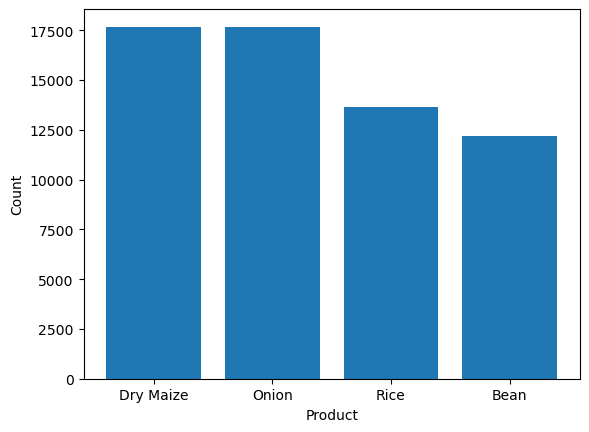

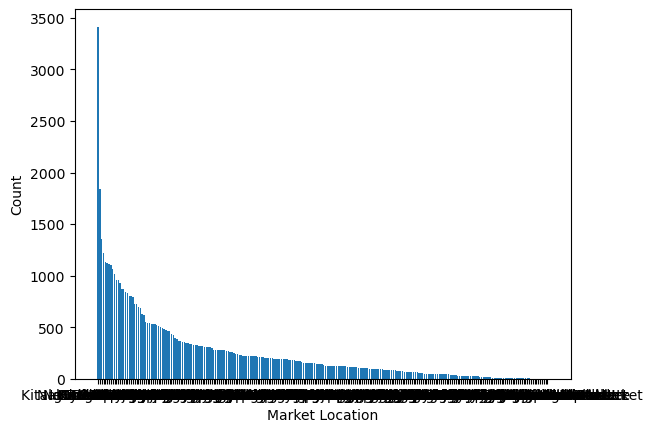

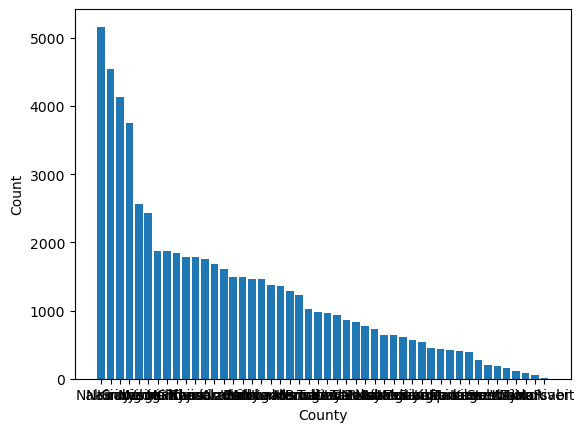

In [18]:
# visualise unique values
# Create a bar chart of the unique values in each categorical column
for col in data_cleaned.select_dtypes(include=['object']):
    unique_values = data_cleaned[col].value_counts()
    plt.bar(unique_values.index, unique_values.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## Drop Test County

Filter the Test County, used in testing the data entry by enumerators, the Test county will be irrelevant in our analysis

In [19]:
# filter county column if the county has word test, and drop the completely
# drop rows where the "County" column contains the word "test"
filtered_df = data_cleaned[data_cleaned["County"].str.contains("test", case=False)]

# Print the filtered DataFrame
print(filtered_df)

# Drop the rows containing "test" in the "County" column
data_cleaned = data_cleaned.drop(filtered_df.index)

# Display the updated DataFrame
print(data_cleaned)


         Product Market Location  Wholesale Price  Supply Volume County  \
1875   Dry Maize     test market            55.56          100.0   test   
11732      Onion     test market           120.00         2000.0   test   
16840  Dry Maize     test market            68.89           90.0   test   
16841  Dry Maize     test market            68.89        10000.0   test   
16843  Dry Maize     test market            56.36        10000.0   test   
...          ...             ...              ...            ...    ...   
59904       Rice     test market           150.00         2000.0   test   
59934      Onion     test market            80.00         2000.0   test   
59966       Bean     test market           111.11         1800.0   test   
59989  Dry Maize     test market            31.11         3600.0   test   
60029       Rice     test market            70.00         1200.0   test   

            Date  usd_rate  
1875  2024-02-20    145.00  
11732 2023-07-06    140.85  
16840 2023-0

## Data Exploration

## Statistical summary

The statistics provide insights into the distribution and central tendency of the numerical variables in the dataset, helping to understand the range and variability of the data.

In [20]:
# statistical summary of the dataset
summary_stats = data_cleaned.describe()
print(summary_stats)


       Wholesale Price  Supply Volume                           Date  \
count     60969.000000   6.096900e+04                          60969   
mean        107.552343   8.650964e+03  2022-08-26 02:09:44.205087744   
min           0.010000   0.000000e+00            2021-05-24 00:00:00   
25%          54.550000   9.000000e+02            2021-12-07 00:00:00   
50%          80.000000   2.500000e+03            2022-08-29 00:00:00   
75%         130.000000   6.000000e+03            2023-04-24 00:00:00   
max      120000.000000   1.000000e+08            2024-04-24 00:00:00   
std         558.242143   4.158682e+05                            NaN   

           usd_rate  
count  60969.000000  
mean     123.376619  
min      107.350000  
25%      112.750000  
50%      119.900000  
75%      133.000000  
max      163.000000  
std       13.793940  


## Products distribution

Bar chart visualisation depicts the distirbution of the products in the dataset

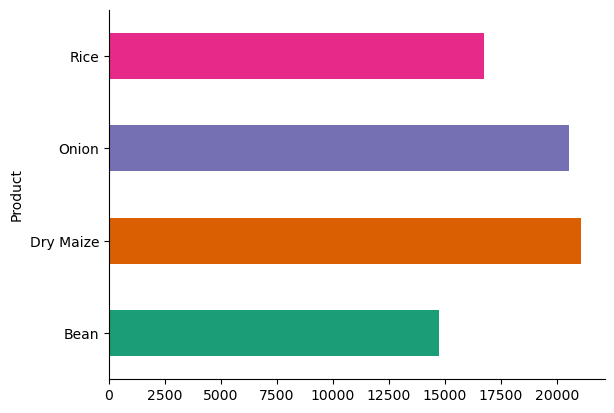

In [21]:
#title Product
data.groupby('Product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


## Distribution of the Counties

Visualize the distribution of counties in the dataset as per the dataset, based on the number of entries

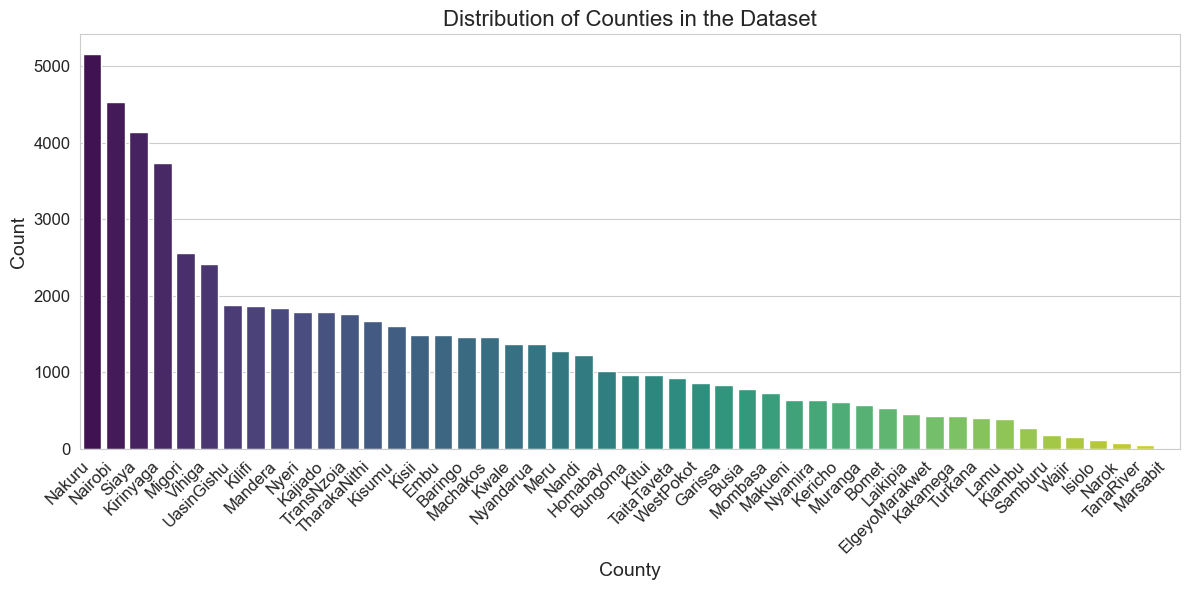

In [22]:
# Set the style for the plots
sns.set_style("whitegrid")
# Distribution of counties
plt.figure(figsize=(12, 6))
sns.countplot(x='County', data=data_cleaned, palette='viridis', order=data_cleaned['County'].value_counts().index)
plt.title('Distribution of Counties in the Dataset', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Average Wholesale price for the Products

Visualising the average wholesale price per product and visualizing it using a bar chart

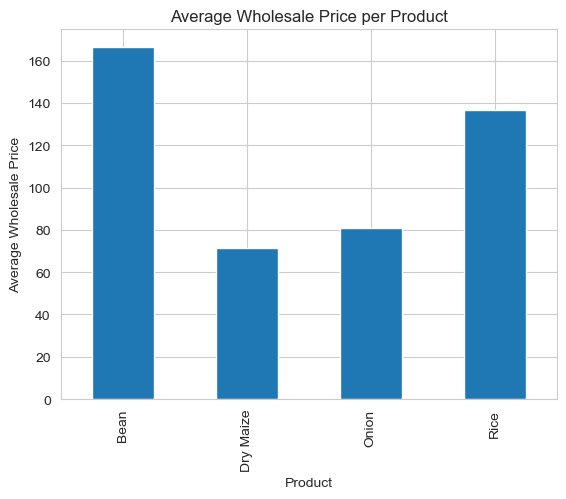

In [23]:
# average wholesale price per product, visualise
# Calculate the average wholesale price per product
average_wholesale_price = data_cleaned.groupby('Product')['Wholesale Price'].mean()

# Visualize the average wholesale price per product using a bar chart
average_wholesale_price.plot(kind='bar')
plt.title('Average Wholesale Price per Product')
plt.ylabel('Average Wholesale Price')
plt.show()


## Top 10 Common Market Location

Visualizing the distribution of the top 10 common market locations in the dataset using a bar plot

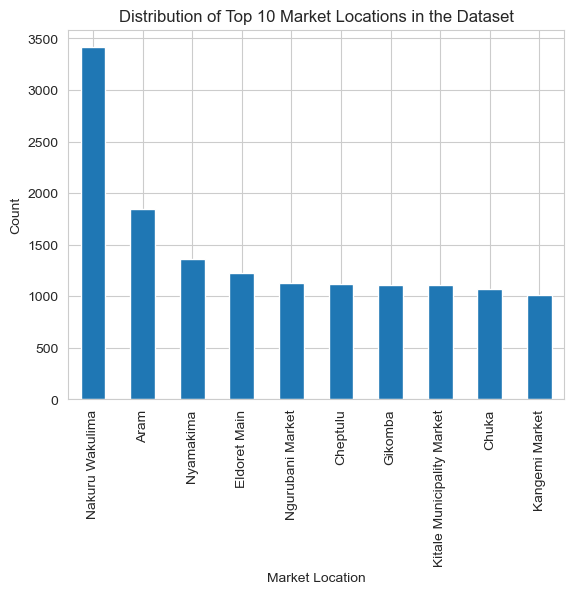

In [24]:
#distribution of the  top 10 common market location
market_counts = data_cleaned['Market Location'].value_counts().head(10)

# plot
fig, ax = plt.subplots()
market_counts.plot(kind='bar', ax=ax)

ax.set_title('Distribution of Top 10 Market Locations in the Dataset')
ax.set_xlabel('Market Location')
ax.set_ylabel('Count')

plt.show()


## Correlation Heatmap

Correlation Matrix:
                 usd_rate  Wholesale Price  Supply Volume
usd_rate         1.000000         0.031122      -0.005513
Wholesale Price  0.031122         1.000000      -0.001058
Supply Volume   -0.005513        -0.001058       1.000000


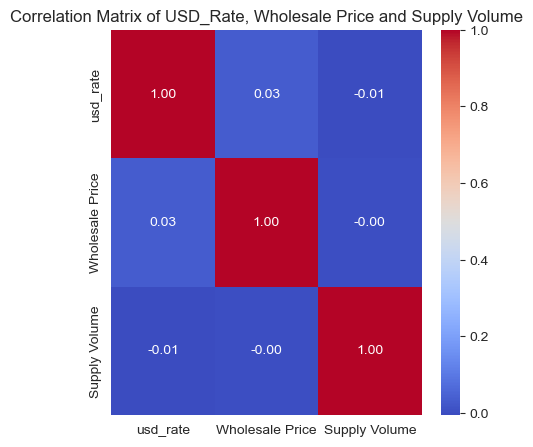

In [25]:
# correlation heatmap between usd_rate and wholesale price of all products
# Calculate the correlation matrix
correlation_matrix = data_cleaned[['usd_rate', 'Wholesale Price', 'Supply Volume']].corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

# Set the title and show the plot
plt.title("Correlation Matrix of USD_Rate, Wholesale Price and Supply Volume")
plt.show()


The correlation coefficient between usd_rate and Wholesale Price is approximately 0.031, indicating a very weak positive correlation.
The correlation coefficient between Supply Volume and Wholesale Price is approximately -0.001, suggesting a very weak negative correlation.
Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak correlation.

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60969 entries, 0 to 73086
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product          60969 non-null  object        
 1   Market Location  60969 non-null  object        
 2   Wholesale Price  60969 non-null  float64       
 3   Supply Volume    60969 non-null  float64       
 4   County           60969 non-null  object        
 5   Date             60969 non-null  datetime64[ns]
 6   usd_rate         60969 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.7+ MB


## Boxplots

Boxplot displays the distribution of values for supply volume and wholesale price with box plots

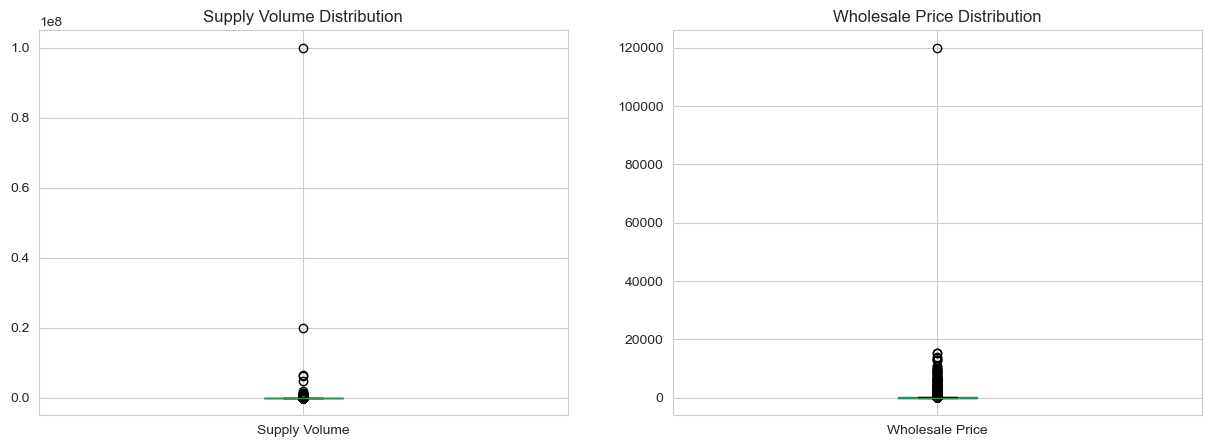

In [27]:
# visualise distribution of values on supply volume and wholesale price with box plots
# Create boxplots for Supply Volume and Wholesale Price
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

data_cleaned.boxplot(column='Supply Volume', ax=axs[0])
axs[0].set_title('Supply Volume Distribution')

data_cleaned.boxplot(column='Wholesale Price', ax=axs[1])
axs[1].set_title('Wholesale Price Distribution')

plt.show()


## Outliers

Outliers for Supply Volume
There are 5,185 outlier observations identified in the 'Supply Volume' column.
These outliers represent unusually high or low values compared to the rest of the data.
Each outlier entry includes details such as the product, market location, wholesale price, supply volume, county, date, and USD exchange rate.
Outliers for Wholesale Price:
There are 673 outlier observations detected in the 'Wholesale Price' column.
These outliers indicate significantly high or low prices compared to the majority of the data.
Each outlier record provides information like the product, market location, wholesale price, supply volume, county, date, and USD exchange rate.

In [28]:
# interquartile range (IQR) for the Supply Volume column
Q1_volume = data_cleaned['Supply Volume'].quantile(0.25)
Q3_volume = data_cleaned['Supply Volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume

# lower and upper bounds for outliers detection for Supply Volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

# Find outliers for Supply Volume using the lower and upper bounds
outliers_volume = data_cleaned[(data_cleaned['Supply Volume'] < lower_bound_volume) | (data_cleaned['Supply Volume'] > upper_bound_volume)]

# interquartile range (IQR) for the Wholesale Price column
Q1_price = data_cleaned['Wholesale Price'].quantile(0.25)
Q3_price = data_cleaned['Wholesale Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# lower and upper bounds for outliers detection for Wholesale Price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Find outliers for Wholesale Price using the lower and upper bounds
outliers_price = data_cleaned[(data_cleaned['Wholesale Price'] < lower_bound_price) | (data_cleaned['Wholesale Price'] > upper_bound_price)]

# Print the outliers for Supply Volume
print("Outliers for Supply Volume:")
print(outliers_volume)

# Print the outliers for Wholesale Price
print("\nOutliers for Wholesale Price:")
print(outliers_price)


Outliers for Supply Volume:
         Product   Market Location  Wholesale Price  Supply Volume  \
37     Dry Maize              Maua            33.33        27000.0   
45     Dry Maize           Kapkwen            35.56        46800.0   
65         Onion       Kathonzweni           200.00        14000.0   
94     Dry Maize            Keroka            35.56        65000.0   
96     Dry Maize  Chepsonoi Market            38.89        16500.0   
...          ...               ...              ...            ...   
72957      Onion          Karatina            30.00        40000.0   
72964      Onion             Chuka            33.33        20000.0   
72996      Onion             Kagio            35.00        17500.0   
72998      Onion              Tawa           333.33        20000.0   
73034      Onion          Karatina            34.00        15000.0   

             County       Date  usd_rate  
37             Meru 2024-04-23     134.0  
45            Bomet 2024-04-23     134.0  
65

## Drop crop prices based on the current Kenyan food prices

Based on the domain knowledge of the market prices of products in Kenya, we dropped values that are extremly lower, and high than the common wholesale prices

In [29]:
data_cleaned = data_cleaned[(data_cleaned['Wholesale Price'] > 10) & (data_cleaned['Wholesale Price'] < 500)]
data_cleaned

,Product,Market Location,Wholesale Price,Supply Volume,County,Date,usd_rate
0,Bean,Mukuyu Market,111.11,360.0,Muranga,2024-04-24,134.00
1,Dry Maize,Nakuru Wakulima,60.00,1300.0,Nakuru,2024-04-24,134.00
2,Dry Maize,Nakuru Wakulima,35.56,1300.0,Nakuru,2024-04-24,134.00
3,Dry Maize,Nakuru Wakulima,40.00,1300.0,Nakuru,2024-04-24,134.00
4,Dry Maize,Chepterit Market Nandi,44.44,4500.0,Nandi,2024-04-24,134.00
...,...,...,...,...,...,...,...
73071,Onion,Sondu Kericho,50.00,4400.0,Kericho,2021-05-24,107.90
73073,Onion,Kongowea,64.29,840.0,Mombasa,2021-05-24,107.90
73084,Dry Maize,Kagio,50.00,4500.0,Kirinyaga,2023-12-25,154.97
73085,Rice,Kagio,150.00,2400.0,Kirinyaga,2023-12-25,154.97


## Price Distribution of Different Products

Price distribution of products in top 5 counties based by the supply volume of all products, this is to compare how the price distribution of the commodities across the counties.

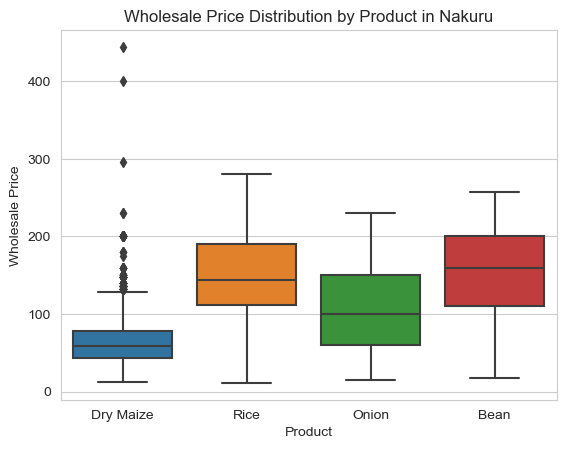

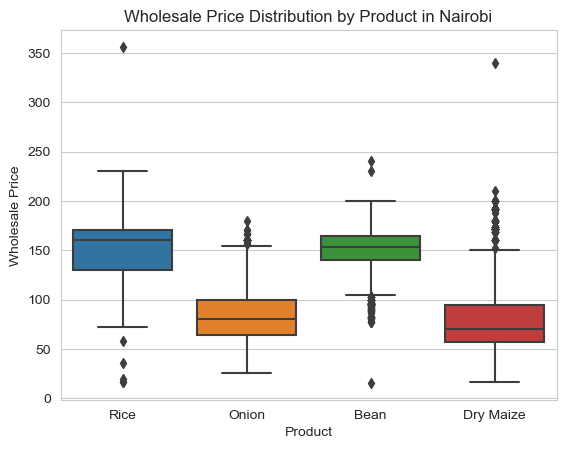

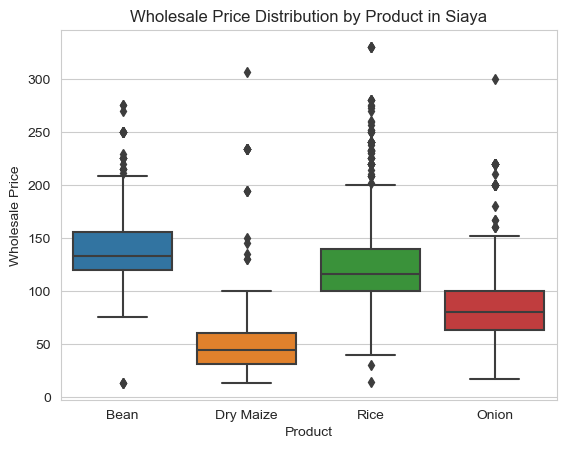

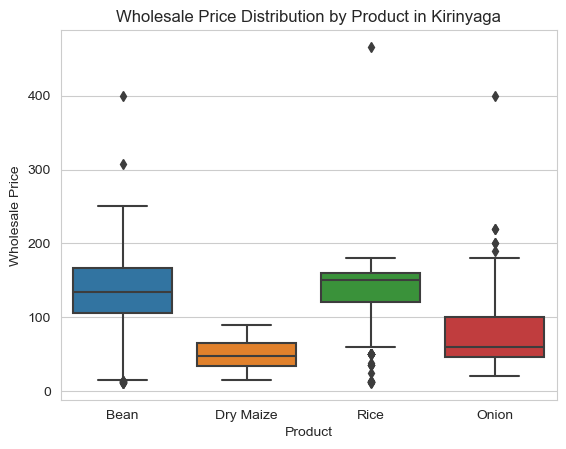

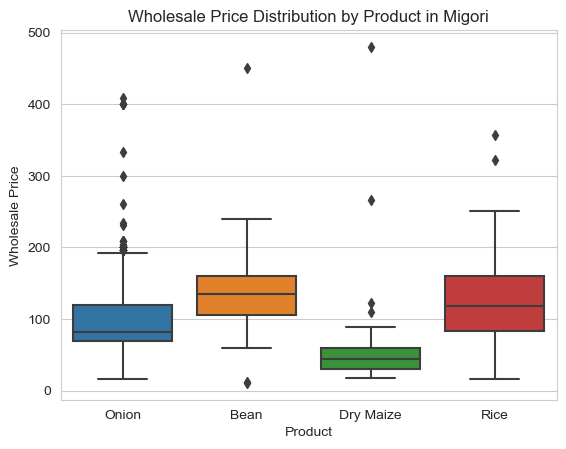

In [30]:
# price distributions for different products within each county.
# Top 5 counties by supply volume
top_10_counties = data_cleaned['County'].value_counts().head(5).index.tolist()

# Analyze price distributions for different products within each county
for county in top_10_counties:
    county_data = data_cleaned[data_cleaned['County'] == county]

    # Create a boxplot for each product
    sns.boxplot(x="Product", y="Wholesale Price", data=county_data)
    plt.title(f"Wholesale Price Distribution by Product in {county}")
    plt.show()


## Scatterplot

These scatterplots visualize relationships between agricultural product prices, supply volumes, and USD exchange rates. They help identify potential correlations and patterns in the data, aiding in market analysis and decision-making.

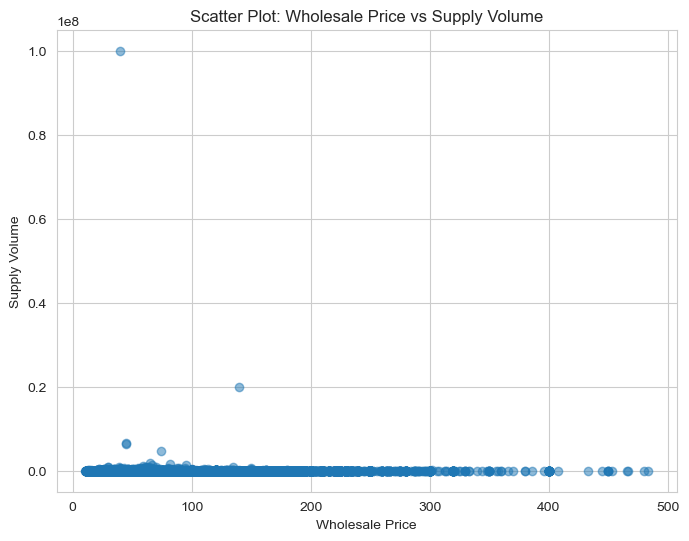

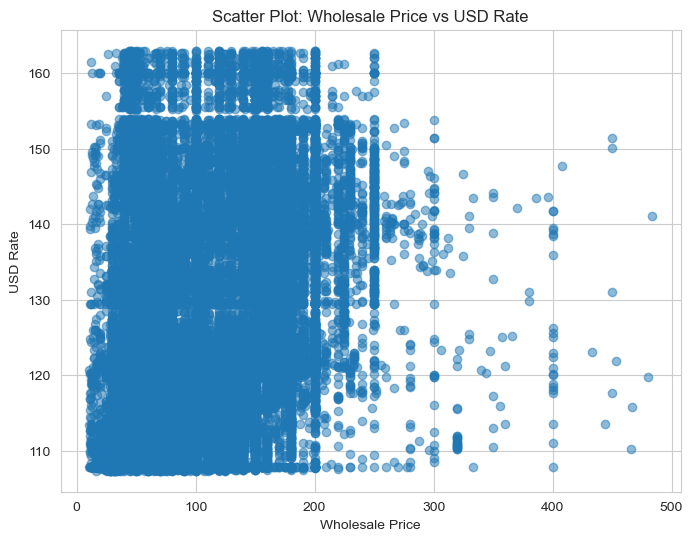

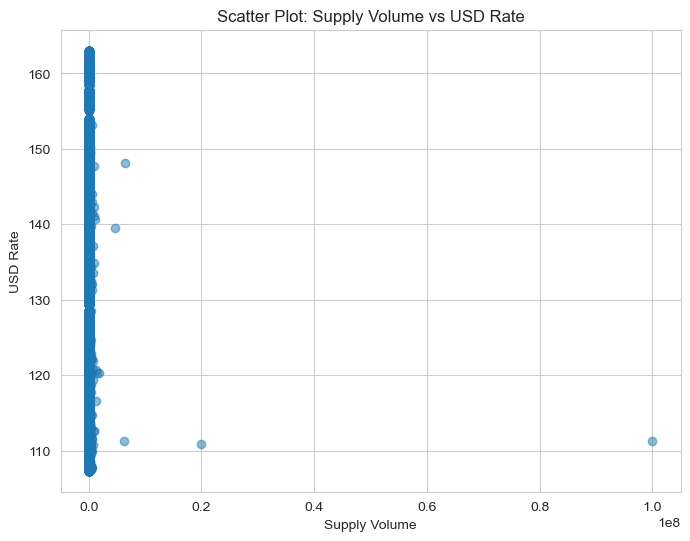

In [31]:
# Scatter plot between Wholesale Price and Supply Volume
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Wholesale Price'], data_cleaned['Supply Volume'], alpha=0.5)
plt.title('Scatter Plot: Wholesale Price vs Supply Volume')
plt.xlabel('Wholesale Price')
plt.ylabel('Supply Volume')
plt.show()

# Scatter plot between Wholesale Price and USD Rate
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Wholesale Price'], data_cleaned['usd_rate'], alpha=0.5)
plt.title('Scatter Plot: Wholesale Price vs USD Rate')
plt.xlabel('Wholesale Price')
plt.ylabel('USD Rate')
plt.show()

# Scatter plot between Supply Volume and USD Rate
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Supply Volume'], data_cleaned['usd_rate'], alpha=0.5)
plt.title('Scatter Plot: Supply Volume vs USD Rate')
plt.xlabel('Supply Volume')
plt.ylabel('USD Rate')
plt.show()


## USD_Rate over Time

The line chart visualizes the change in USD exchange rates over time in Kenya. It shows fluctuations and trends in the exchange rate from the earliest to the latest recorded dates. This visualization provides insights into the volatility and stability of the USD against the Kenyan currency over the specified period.

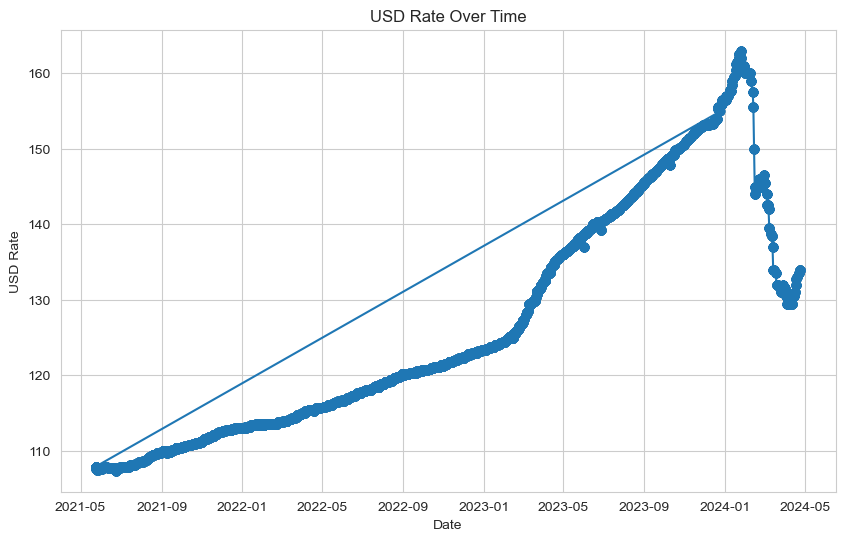

In [32]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Date'], data_cleaned['usd_rate'], marker='o', linestyle='-')
plt.title('USD Rate Over Time')
plt.xlabel('Date')
plt.ylabel('USD Rate')
plt.grid(True)
plt.show()

## Wholesale Price Mode and USD_rate over time

The plot visualizes the wholesale price (mode) and USD exchange rates over time in Kenya. The mode of the wholesale price is represented by a horizontal dashed line in blue, while the wholesale price and USD rate are shown as line plots in green and red, respectively. The primary y-axis represents the wholesale price, and the secondary y-axis represents the USD rate. The plot allows for the comparison of the mode of wholesale prices with fluctuations in the USD exchange rate over the specified time period.

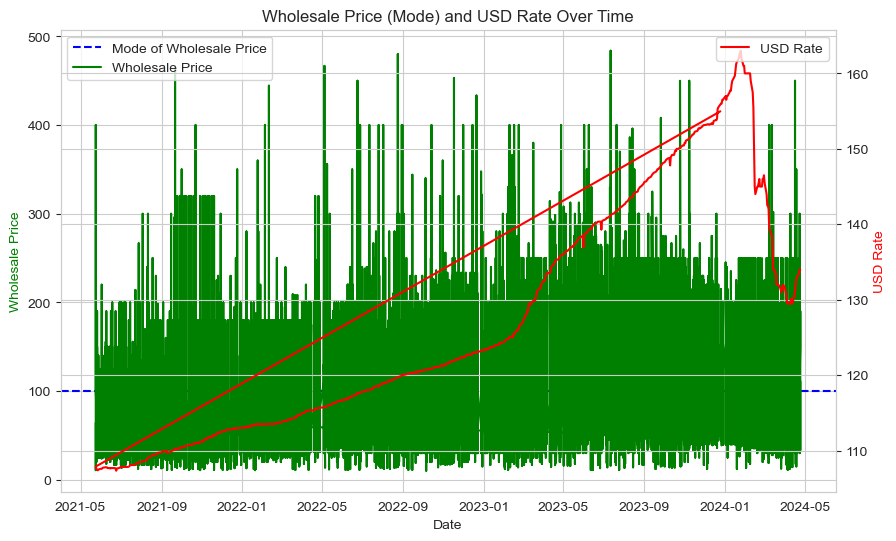

In [33]:
# Calculate the mode of the wholesale price
wholesale_price_mode = data_cleaned['Wholesale Price'].mode()[0]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the mode of the wholesale price as a horizontal line
ax1.axhline(y=wholesale_price_mode, color='blue', linestyle='--', label='Mode of Wholesale Price')

# Plot the first data on the primary y-axis
ax1.plot(data_cleaned['Date'], data_cleaned['Wholesale Price'], color='green', label='Wholesale Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wholesale Price', color='green')

# Create a secondary y-axis and plot the second data on it
ax2 = ax1.twinx()
ax2.plot(data_cleaned['Date'], data_cleaned['usd_rate'], color='red', label='USD Rate')
ax2.set_ylabel('USD Rate', color='red')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Wholesale Price (Mode) and USD Rate Over Time')

# Show plot
plt.show()


## Line Chart

The line chart depicts the wholesale prices of different products over time, with each product represented by a distinct color. The x-axis denotes the date, while the y-axis indicates the wholesale price. The plot enables comparison of the price trends of various products throughout the specified time period.

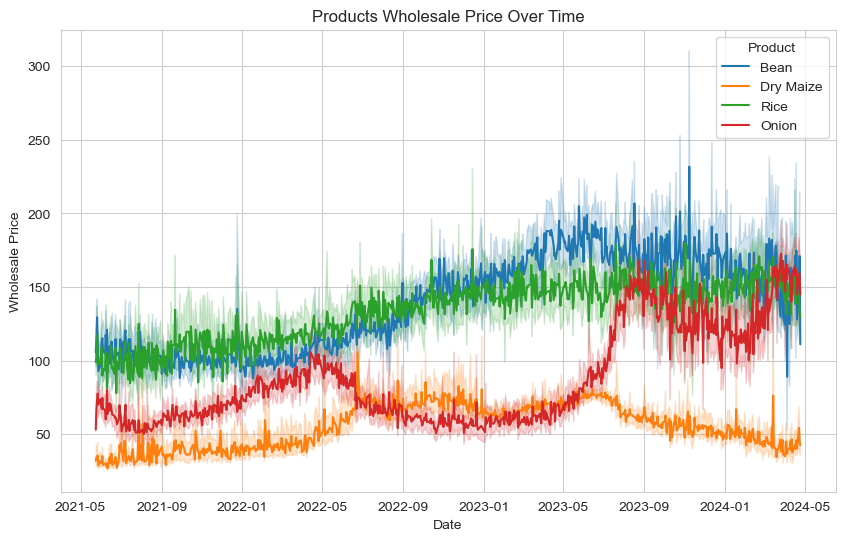

In [34]:
# wholesale price of products with a hue of Product
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x="Date", y="Wholesale Price", hue="Product")
plt.title("Products Wholesale Price Over Time")
plt.xlabel("Date")
plt.ylabel("Wholesale Price")
plt.grid(True)
plt.show()


## Line chart

Visualisation of the change of USD rate over Time, with a hue of the wholesale price of the products, is to check whether the change of usd rate and wholesale follows a similar trend though it is relative.

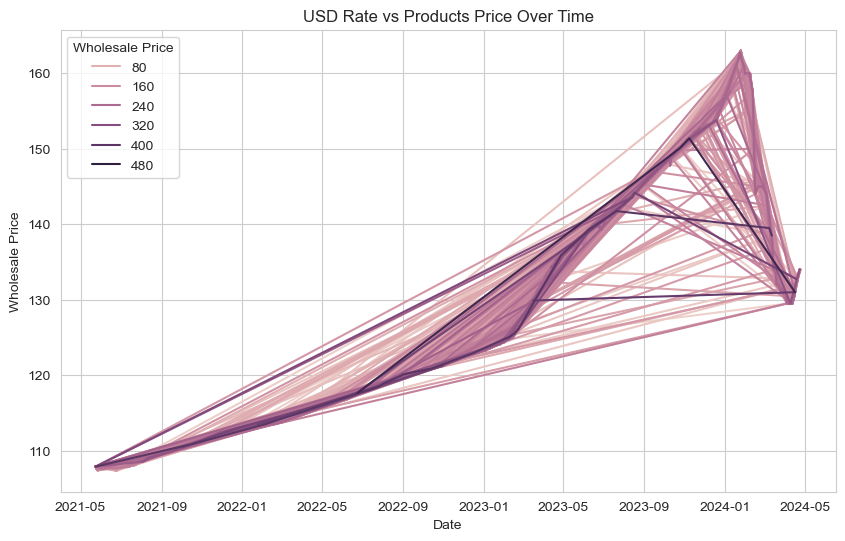

In [35]:
# visualise Usd rate vs Products over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x="Date", y="usd_rate", hue="Wholesale Price")
plt.title("USD Rate vs Products Price Over Time")
plt.xlabel("Date")
plt.ylabel("Wholesale Price")
plt.grid(True)
plt.show()


## Market trend analysis

The line plot showing the trend of wholesale prices over time. It visualizes how wholesale prices have changed over the entire period of available data.

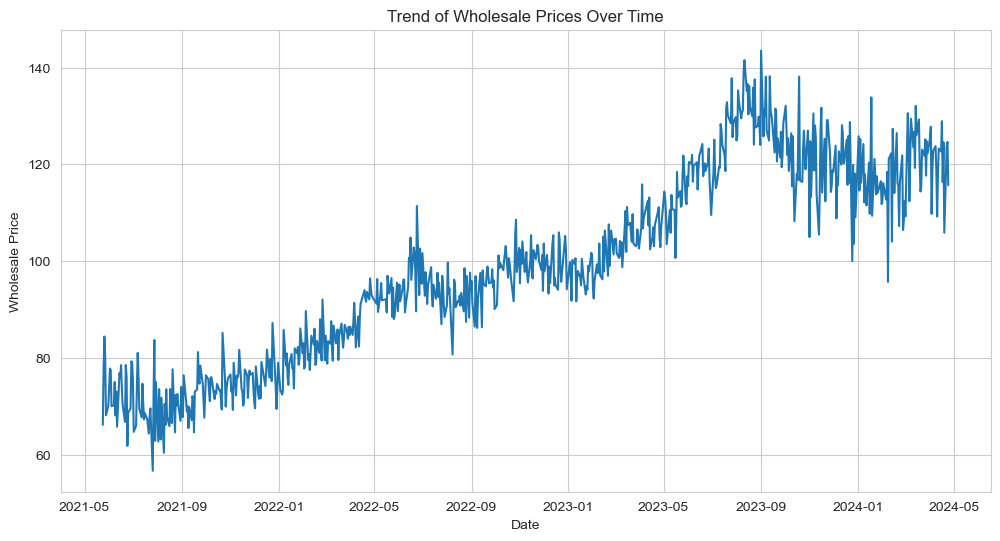

In [36]:
# Market Trends Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Wholesale Price', data=data_cleaned, ci=None)
plt.title('Trend of Wholesale Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Wholesale Price')
plt.show()


## Comparison on Supply Volume and Wholesale Prices

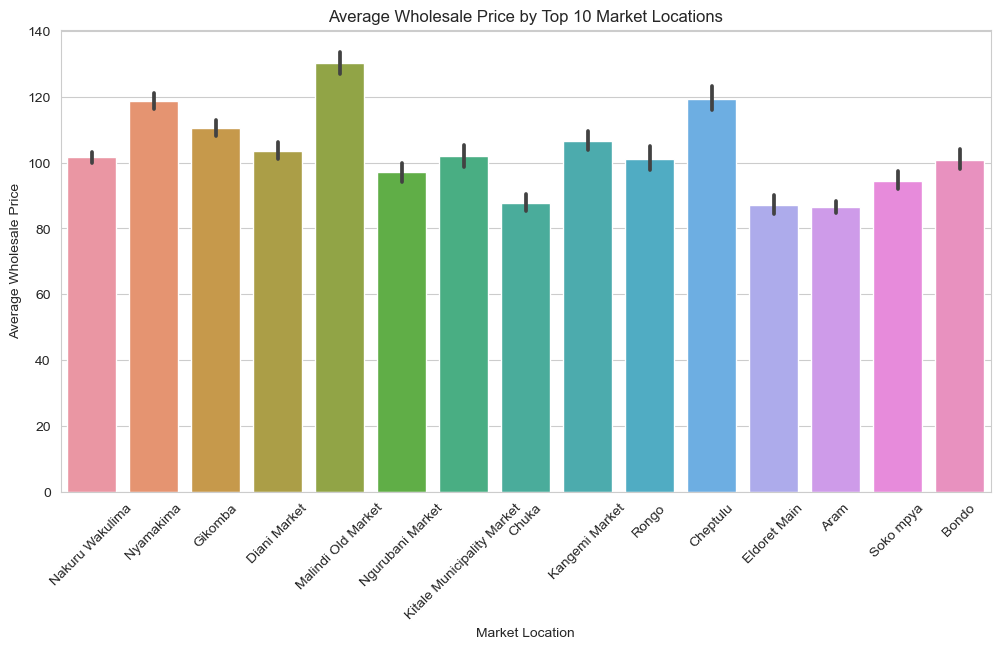

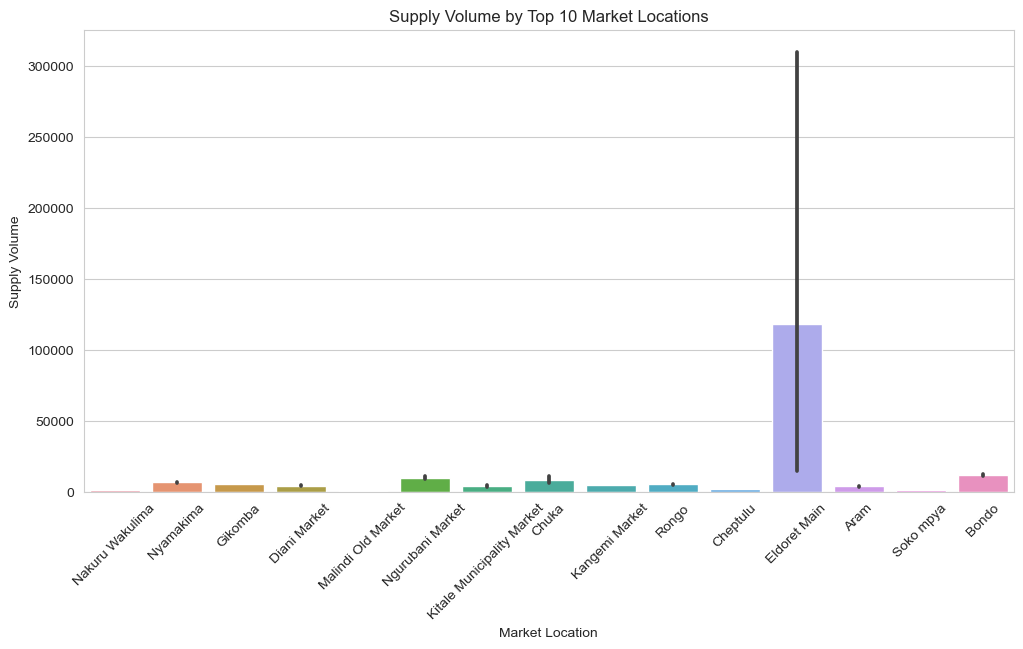

In [37]:
# Calculate the count of each market location
market_location_counts = data_cleaned['Market Location'].value_counts()

# Get the top 10 common market locations
top_10_market_locations = market_location_counts.nlargest(15).index.tolist()

# Plot comparison of average wholesale price by market location
plt.figure(figsize=(12, 6))
sns.barplot(x='Market Location', y='Wholesale Price', data=data_cleaned[data_cleaned['Market Location'].isin(top_10_market_locations)])
plt.title('Average Wholesale Price by Top 10 Market Locations')
plt.xlabel('Market Location')
plt.ylabel('Average Wholesale Price')
plt.xticks(rotation=45)
plt.show()

# Plot comparison of supply volume by market location
plt.figure(figsize=(12, 6))
sns.barplot(x='Market Location', y='Supply Volume', data=data_cleaned[data_cleaned['Market Location'].isin(top_10_market_locations)])
plt.title('Supply Volume by Top 10 Market Locations')
plt.xlabel('Market Location')
plt.ylabel('Supply Volume')
plt.xticks(rotation=45)
plt.show()


## Associative Analysis

In [38]:
# Convert categorical columns to one-hot encoded format
data_encoded = pd.get_dummies(data_cleaned.astype(str))

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules)


                         antecedents                        consequents  \
0  (Market Location_Nakuru Wakulima)                    (County_Nakuru)   
1                    (County_Nakuru)  (Market Location_Nakuru Wakulima)   
2                  (Date_2021-05-24)                   (usd_rate_107.9)   
3                   (usd_rate_107.9)                  (Date_2021-05-24)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.056415            0.084281  0.056415    1.000000  11.865062   
1            0.084281            0.056415  0.056415    0.669363  11.865062   
2            0.076766            0.077447  0.076766    1.000000  12.911979   
3            0.077447            0.076766  0.076766    0.991198  12.911979   

   leverage  conviction  zhangs_metric  
0   0.05166         inf       0.970467  
1   0.05166    2.853839       1.000000  
2   0.07082         inf       0.999262  
3   0.07082  104.888417       1.000000  


In [39]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60144 entries, 0 to 73086
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product          60144 non-null  object        
 1   Market Location  60144 non-null  object        
 2   Wholesale Price  60144 non-null  float64       
 3   Supply Volume    60144 non-null  float64       
 4   County           60144 non-null  object        
 5   Date             60144 non-null  datetime64[ns]
 6   usd_rate         60144 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.7+ MB


In [40]:
data_cleaned.shape

(60144, 7)

## Feature Engineering

## Rename Columns

In [41]:
# rename price column to usd_rate
data_cleaned.rename(columns={'Price': 'usd_rate'}, inplace=True)
print(data_cleaned.columns)

Index(['Product', 'Market Location', 'Wholesale Price', 'Supply Volume',
       'County', 'Date', 'usd_rate'],
      dtype='object')


## Ratio of Supply Volume to Wholesale Price

In [42]:
# ratio of supply volume to wholesale price.

data_cleaned['supply_volume_ratio'] = data_cleaned['Supply Volume'] / data_cleaned['Wholesale Price']
data_cleaned

,Product,Market Location,Wholesale Price,Supply Volume,County,Date,usd_rate,supply_volume_ratio
0,Bean,Mukuyu Market,111.11,360.0,Muranga,2024-04-24,134.00,3.240032
1,Dry Maize,Nakuru Wakulima,60.00,1300.0,Nakuru,2024-04-24,134.00,21.666667
2,Dry Maize,Nakuru Wakulima,35.56,1300.0,Nakuru,2024-04-24,134.00,36.557930
3,Dry Maize,Nakuru Wakulima,40.00,1300.0,Nakuru,2024-04-24,134.00,32.500000
4,Dry Maize,Chepterit Market Nandi,44.44,4500.0,Nandi,2024-04-24,134.00,101.260126
...,...,...,...,...,...,...,...,...
73071,Onion,Sondu Kericho,50.00,4400.0,Kericho,2021-05-24,107.90,88.000000
73073,Onion,Kongowea,64.29,840.0,Mombasa,2021-05-24,107.90,13.065796
73084,Dry Maize,Kagio,50.00,4500.0,Kirinyaga,2023-12-25,154.97,90.000000
73085,Rice,Kagio,150.00,2400.0,Kirinyaga,2023-12-25,154.97,16.000000


In [43]:
# create new features from date column to extract year, month, day of the month, and drop Date column

import pandas as pd
import datetime

# Extract year, month, and day from the Date column
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Date']).dt.year
data_cleaned['Month'] = pd.to_datetime(data_cleaned['Date']).dt.month
data_cleaned['Day'] = pd.to_datetime(data_cleaned['Date']).dt.day

# Drop the original Date column
data_cleaned.drop('Date', axis=1, inplace=True)

# Print the updated DataFrame
print(data_cleaned)


         Product          Market Location  Wholesale Price  Supply Volume  \
0           Bean            Mukuyu Market           111.11          360.0   
1      Dry Maize          Nakuru Wakulima            60.00         1300.0   
2      Dry Maize          Nakuru Wakulima            35.56         1300.0   
3      Dry Maize          Nakuru Wakulima            40.00         1300.0   
4      Dry Maize  Chepterit Market  Nandi            44.44         4500.0   
...          ...                      ...              ...            ...   
73071      Onion            Sondu Kericho            50.00         4400.0   
73073      Onion                 Kongowea            64.29          840.0   
73084  Dry Maize                    Kagio            50.00         4500.0   
73085       Rice                    Kagio           150.00         2400.0   
73086      Onion                    Kagio           100.00         3500.0   

          County  usd_rate  supply_volume_ratio  Year  Month  Day  
0      

In [44]:
data_cleaned.columns

Index(['Product', 'Market Location', 'Wholesale Price', 'Supply Volume',
       'County', 'usd_rate', 'supply_volume_ratio', 'Year', 'Month', 'Day'],
      dtype='object')

## One Hote Encoding

In [45]:
# Extract categorical and numerical columns
categorical_columns = ['Product','Market Location' ,'County']
numerical_columns = ['Wholesale Price', 'Supply Volume', 'usd_rate', 'Year', 'Month', 'Day','supply_volume_ratio']

# One-hot encode categorical variables using get_dummies
encoded_data= pd.get_dummies(data_cleaned, columns=['Product', 'Market Location', 'County'], dtype=int)


# Check for missing values
print(encoded_data.isnull().sum())


Wholesale Price        0
Supply Volume          0
usd_rate               0
supply_volume_ratio    0
Year                   0
                      ..
County_Turkana         0
County_UasinGishu      0
County_Vihiga          0
County_Wajir           0
County_WestPokot       0
Length: 303, dtype: int64


In [46]:
encoded_data.head()

,Wholesale Price,Supply Volume,usd_rate,supply_volume_ratio,Year,Month,Day,Product_Bean,Product_Dry Maize,Product_Onion,...,County_Siaya,County_TaitaTaveta,County_TanaRiver,County_TharakaNithi,County_TransNzoia,County_Turkana,County_UasinGishu,County_Vihiga,County_Wajir,County_WestPokot
0,111.11,360.0,134.0,3.240032,2024,4,24,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.00,1300.0,134.0,21.666667,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,35.56,1300.0,134.0,36.557930,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,40.00,1300.0,134.0,32.500000,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,44.44,4500.0,134.0,101.260126,2024,4,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the data (assuming 'encoded_data' is already defined)

# Separate features and target
X = encoded_data.drop('Wholesale Price', axis=1)
y = encoded_data['Wholesale Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'{name} score: {score}')


Linear Regression score: 0.6080187364821623
Random Forest score: 0.9603679289777158
XGBoost score: 0.9800771396392153
Decision Tree score: 0.9356775650652218


## Model Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Adjusted parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],  # Reduce the number of estimators
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform GridSearchCV for XGBoost
xgb_grid_search.fit(X_train, y_train)

# Get the best estimator for XGBoost
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate the tuned XGBoost model
xgb_score = best_xgb_model.score(X_test, y_test)

print('Best XGBoost Model:')
print(f'Score: {xgb_score}')
print(f'Best Parameters: {xgb_grid_search.best_params_}')


Best XGBoost Model:
Score: 0.9569608985125263
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


### Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Get the best XGBoost model from GridSearchCV
best_xgb_model = xgb_grid_search.best_estimator_

# Predict the target values using the best XGBoost model
y_pred = best_xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print("Best XGBoost Model Evaluation Metrics:")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)


Best XGBoost Model Evaluation Metrics:
RMSE: 10.549295117708834
MSE: 111.28762748051543
MAE: 6.69311668725982
MAPE: 8.598431868010932


### Model Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define a custom scoring function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE, MSE, and MAE from cross-validation scores
rmse_cv = np.sqrt(-cv_scores)
mse_cv = -cv_scores
mae_cv = -cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mape_cv = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring=mape_scorer)

# Print the results
print("Cross-Validation Results:")
print("RMSE (Mean):", rmse_cv.mean())
print("MSE (Mean):", mse_cv.mean())
print("MAE (Mean):", mae_cv.mean())
print("MAPE (Mean):", mape_cv.mean())


Cross-Validation Results:
RMSE (Mean): 10.830697513853782
MSE (Mean): 117.41459347464642
MAE (Mean): 6.81010302067732
MAPE (Mean): -8.647761071795346


### Finalise on the best model

In [53]:
from xgboost import XGBRegressor
import joblib

# Assuming best_xgb_model is your finalized XGBoost model
best_xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0)

# Train the finalized XGBoost model on the entire training dataset
best_xgb_model.fit(X_train, y_train)

# Optionally, evaluate the finalized XGBoost model on the test set
final_test_score = best_xgb_model.score(X_test, y_test)
print(f'Final Test Set Score (XGBoost): {final_test_score}')

# Save the finalized XGBoost model for future use or deployment
joblib.dump(best_xgb_model, 'finalized_xgboost_model.pkl')



Final Test Set Score (XGBoost): 0.9553841741653759


['finalized_xgboost_model.pkl']

In [56]:

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Load your XGBoost model
model = xgb.XGBRegressor()
model.load_model('finalized_xgboost_model.pkl')
# Make predictions
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y_true, y_pred)

print(f"Mean Squared Error: {mse}")


# Check a few predictions
predictions = pd.DataFrame({'True': y_true, 'Predicted': y_pred})
print(predictions.head())

XGBoostError: bad allocation